<a href="https://colab.research.google.com/github/vishnuvryeruva/Crunchbase/blob/main/Vishnu_CMPE_257_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Static Part** on the Cisco Company.

In this section, we will include many sections which shows our research and will also include facts and figures regarding the Company "Cisco". The results will be stored in a .txt file.

Mounting Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing the libraries

In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

Here, we will be focussing on company "cisco".

In [ ]:
base_url = "https://www.crunchbase.com/organization/"
# finance_url = "/company_financials"
# We will focus more on 3 columns namely "People", "news" and "Cisco" company.
people = "/people"
news = "/signals_and_news"
company_to_search = "cisco"

In [ ]:
headers = {
    "content-type": "application/json",
    "user-agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36",
}

In [ ]:
res = requests.get(url=base_url + company_to_search, headers=headers)

soup = BeautifulSoup(res.text, "html.parser")

In [ ]:
organisation_name = soup.find("h1", {"class" : "profile-name"}).text
# CompanyName
print(organisation_name)

 Cisco 


In [ ]:
about_section, highlight_section, news_section = soup.findAll("div", {"class" : "one-of-many-section"})

Basic Description
One liner description of Cisco

In [ ]:
company_description = about_section.find("span", {"class" : "description"}).text
#Companyh description
print(company_description)

Cisco develops, manufactures, and sells networking hardware, telecommunications equipment, and other technology services and products.


In [ ]:
location, size, funding_type, ipo_status, url, cs_rank = [section.text for section in about_section.findAll("li")]

In [ ]:
profile_card = soup.find("ul", {"class" : "text_and_value"}).findAll("li")


Let us look into some basic information about the Cisco Company.

The basic information will contain:

1) Headquaters,

2) Founders,

3) Date of foundation,

4)Legal name , etc.

In [ ]:
for section in profile_card:
    print(section.find("label-with-info").text, section.find("field-formatter").text)

Industries  Communications InfrastructureEnterprise SoftwareHardware
Headquarters Regions   San Francisco Bay Area, Silicon Valley, West Coast
Founded Date  Dec 1, 1984
Founders   Ashwath Nagaraj, Demetrius White, Leonard Bosack, Robert Hubbard, Sandy Lerner, Santana jordan isaiah Henry
Operating Status  Active
Last Funding Type  Series A
Also Known As  Cisco Systems
Legal Name  Cisco Systems, Inc.
Related Hubs   Cisco Alumni Founded Companies, Cisco Portfolio Companies
Hub Tags   Crunchbase Venture Program



Now, the question arises that the company we are targetting (Cisco) mainly focusses in which industry?


In [ ]:
industries = []

for industry in profile_card[0].findAll("a"):
    industries.append(industry.text)

print(industries)

['Communications Infrastructure', 'Enterprise Software', 'Hardware']


When did Cisco did lay its foundation?

In [ ]:
founded_date = profile_card[2].find("field-formatter").text
founded_date

'Dec 1, 1984'

Who are the founders of Cisco?

In [ ]:
founder = profile_card[3].find("field-formatter").text
founder

' Ashwath Nagaraj, Demetrius White, Leonard Bosack, Robert Hubbard, Sandy Lerner, Santana jordan isaiah Henry'

people

In [ ]:
res = requests.get(url=base_url + company_to_search + people, headers=headers)

soup = BeautifulSoup(res.text, "html.parser")

In [ ]:
company_people = soup.find("div", {"class" : "main-content"}).findAll("row-card")

org_people = {}

Which person are at which positions in Cisco?

In [ ]:
for person in company_people[1].find("image-list-card").findAll("li"):
    org_people[person.find("field-formatter").text] = person.find("a").text

print(org_people)

{'Chairman & CEO': ' Chuck Robbins ', 'Principal Engineer': ' Matt Swartz ', 'Senior Director, Technology Policy, Global Government Affairs': ' Eric Wenger ', 'Managing Director EMEAR, Cisco Investments and Corporate Development': ' Jon Koplin ', 'Managing Director - Strategy and Business Development': ' Bill Gerhardt ', 'Sr. Director, Customer Experience': ' Tal Schierau ', 'Executive Producer, Unhackable with Mike Storm, a Security Podcast Series': ' Caroline Baker ', 'Director of Employee Experience': ' Kelly Crothers '}


In [ ]:
org_board = []

Who are the board members of Cisco?

In [ ]:
for person in company_people[2].find("image-list-card").findAll("li"):
    org_board.append(person.find("a").text)

print(org_board)

[' Michael Capellas ', ' Arun Sarin ', ' Brian Halla ', ' Chuck Robbins ', ' Kristina Johnson ', ' John Chambers ', ' Roderick McGeary ', ' Tomasz Maslewski ']


Cisco Scraping
**bold text**
Now, we will scrape the news about various topics related to Cisco

In [ ]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pygooglenews import GoogleNews

gn = GoogleNews(lang = 'en', country = 'US')

# latest news on Amazon that got published over the last hour
news = gn.search('Cisco',when= "100y")

In [ ]:
import shutil

In [ ]:
# shutil.copy("/content/CiscoCompany.json","/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/json")

#Dataset Formation

Here, we will scrape the news related to different topics related to Cisco during 6 months.

Note: I have commented the whole scraped code in order to prevent re-scraping of the data again and again. Instead, we have saved all the .csv files inside the shared Google Drive of Team Dragonites.

In [ ]:
# import pandas as pd

# pdObj = pd.read_json('/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/json/Webexnews.json', orient='index')
# print(pdObj)

In [ ]:
# import pandas as pd
# from pygooglenews import GoogleNews
# # import datetime

# gn = GoogleNews()

# def get_news(search):
#     stories = []
#     start_date = datetime.date(2021,3,1)
#     end_date = datetime.date(2021,9,1)
#     delta = datetime.timedelta(days=1)
#     date_list = pd.date_range(start_date, end_date).tolist()
    
#     for date in date_list[:-1]:
#         result = gn.search(search, from_=date.strftime('%Y-%m-%d'), to_=(date+delta).strftime('%Y-%m-%d'))
#         newsitem = result['entries']
        
#         for item in newsitem:
#             story = {
#                 'title':item.title,
#                 'link':item.link,
#                 'published':item.published
#             }
#             stories.append(story)

#     return stories


Now, we will research about the general news of Cisco from past 6 month

In [ ]:
# CiscoNews = pd.DataFrame(get_news('Cisco'))

In [ ]:
# CiscoNews.shape

Let us see what news are available for CEO of Cisco

In [ ]:
# CEONews = pd.DataFrame(get_news('Chuck Robbins'))


In [ ]:
# CEONews.shape

Let us see what news are available for Vice President of Cisco

In [ ]:
# VPNews = pd.DataFrame(get_news('Sandeep Arora'))

In [ ]:
# VPNews.shape

The news  regarding the Senior Director of Cisco are :

In [ ]:
# DirectorNews = pd.DataFrame(get_news('Eric Wenger'))

In [ ]:
# DirectorNews.shape

Let us see what workers of Cisco has to say in the news:

In [ ]:
# WorkersNews = pd.DataFrame(get_news('Cisco Workers'))

In [ ]:
# WorkersNews.shape

What were the news for founders of Cisco?

In [ ]:
# SandyNews = pd.DataFrame(get_news('Sandy Lerner'))
# LeonardNews = pd.DataFrame(get_news('Leonard Bosack'))

In [ ]:
# SandyNews.shape

In [ ]:
# LeonardNews.shape

The recent news about the stocks of Cisco are :

In [ ]:
# StockNews = pd.DataFrame(get_news('Cisco Stock'))

In [ ]:
# StockNews.shape

Some news about the products of Cisco .

Products of which the news is scraped are :

a) Duo Security
b) Webex
c) Jabber

In [ ]:
# WebexNews = pd.DataFrame(get_news('Cisco Webex'))
# DuoSecurityNews = pd.DataFrame(get_news('Cisco Duo Security'))
# JabberNews = pd.DataFrame(get_news('Cisco Jabber'))

In [ ]:
# WebexNews.shape

In [ ]:
# DuoSecurityNews.shape

In [ ]:
# JabberNews.shape

Till now, we scraped the different types of news related to Cisco from Founders of Cisco to latest products of Cisco and have saved in the Google Drive

Now, we will save each of the dataset into google drive.

In [ ]:
# CiscoNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/CiscoNews.csv", index=False, encoding='utf-8-sig')

In [ ]:
# CiscoNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/CiscoNews.csv", index=False, encoding='utf-8-sig')
# CEONews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/CEONews.csv", index=False, encoding='utf-8-sig')
# VPNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/VPNews.csv", index=False, encoding='utf-8-sig')
# DirectorNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/DirectorNews.csv", index=False, encoding='utf-8-sig')
# WorkersNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/WorkersNews.csv", index=False, encoding='utf-8-sig')
# SandyNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/SandyNews.csv", index=False, encoding='utf-8-sig')
# StockNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/StockNews.csv", index=False, encoding='utf-8-sig')
# WebexNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/WebexNews.csv", index=False, encoding='utf-8-sig')
# DuoSecurityNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/DuoSecurityNews.csv", index=False, encoding='utf-8-sig')
# JabberNews.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/JabberNews.csv", index=False, encoding='utf-8-sig')

In [ ]:
# d = pd.merge(SandyNews,VPNews)

In [ ]:
# SandyNews.head()

In [ ]:
# frames = [DirectorNews, JabberNews,CiscoNews,CEONews,VPNews,WorkersNews,SandyNews,StockNews,WebexNews,DuoSecurityNews]
  
# result = pd.concat(frames)

In [ ]:
# result.shape

In [ ]:
# result.head()

This is our final combined dataset, which will be saved inside the Shared Google Drive of Team Dragonites

In [ ]:
# result.to_csv( "/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/result.csv", index=False, encoding='utf-8-sig')


In [ ]:
# d.head()

Now, we will get the combined dataset from the shared Google Drive and perform our operations to research about the company.

In [ ]:
import pandas as pd
data1 = pd.read_csv("/content/drive/MyDrive/Team Dragonites/Final Exam/dataset/csv/result.csv")

In [ ]:
# A close look at the dataset 
data1.head()

,title,link,published
0,Readers envisioned a new downtown OKC in first...,https://www.oklahoman.com/story/news/2021/03/1...,"Fri, 19 Mar 2021 07:00:00 GMT"
1,OKC seeks bids to demolish public safety compl...,https://journalrecord.com/2021/04/21/okc-seeks...,"Wed, 21 Apr 2021 07:00:00 GMT"
2,Epilepsy Discovery Reveals Why Some Seizures P...,https://news.virginia.edu/content/epilepsy-dis...,"Tue, 27 Apr 2021 07:00:00 GMT"
3,New research sheds light on what causes sudden...,https://www.news-medical.net/news/20210428/New...,"Wed, 28 Apr 2021 07:00:00 GMT"
4,Epilepsy Study Reveals Why Some Seizures Prove...,https://www.technologynetworks.com/neuroscienc...,"Thu, 29 Apr 2021 07:00:00 GMT"


In [ ]:
data1.shape[0]

4474

Note: We have scraped 4474 news records of different topics related to Cisco.

Text Summarization:

The practice of condensing the most significant information from a source (or sources) to generate an abbreviated version for a specific user (or users) and job is known as text summarizing (or tasks). 

We will try to generate a summarized text from all the news related to Cisco

In [ ]:
x = ""
data1.shape

(4474, 3)

In [ ]:
for i in range(0,4474):
  x += data1['title'][i] + " "

In [ ]:
# The COmbined paragraph containing all the news from the dataset , which is ready to be summarized.
print(x)

Readers envisioned a new downtown OKC in first OKC Central Live Chat - Oklahoman.com OKC seeks bids to demolish public safety complex - Journal Record Epilepsy Discovery Reveals Why Some Seizures Prove Deadly - UVA Today New research sheds light on what causes sudden unexpected death in epilepsy - News-Medical.Net Epilepsy Study Reveals Why Some Seizures Prove Deadly - Technology Networks Oklahoma City budget adopted with a record $240 million for police - Oklahoman.com Arsenal still haunted by ghost of David Dein 14 years on - Pain In The Arsenal Arsenal legend Arsene Wenger linked with return to management three years after leaving Emirates - Daily Mail Rocky Ragusa looks at McKay Wenger in Speed Week - Pontiac Daily Leader 5 best practices for Slack implementation success - TechTarget Cisco All-In On XaaS, Observability, And Collaboration At Its 2021 Live! Conference - Forbes Embracing Cross-Company Collaboration | No Jitter - No Jitter 3 Ways To Connect Cisco Jabber And Microsoft T

Here, the text summarization process starts by the preprocessing the data.

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords = set (stopwords.words("english"))
words = word_tokenize(x)
freqTable = dict()

In [ ]:
for word in words:
  word = word.lower()
  if word in stopwords:
    continue
  if word in freqTable:
    freqTable[word] += 1
  else:
    freqTable[word] = 1

In [ ]:
sentences = sent_tokenize(x)
sentenceValue = dict()

In [ ]:
for sentence in sentences:
  for word,freq in freqTable.items():
    if word in sentence.lower():
      if sentence in sentence.lower():
        sentenceValue[sentence] += freq
      else:
        sentenceValue[sentence] = freq

In [ ]:
sumValues = 0
for sentence in sentenceValue:
  sumValues += sentenceValue[sentence]
average = int(sumValues / len(sentenceValue))

Now, we will generate the summarized text for Cisco

In [ ]:
summary = ''
for sentence in sentences:
  if(sentence in sentenceValue) and (sentenceValue[sentence]>(1.2*average)):
    summary += " " + sentence
print(summary)

 But How? Smack! Pow! - Bam! Smack! Pow! - BankInfoSecurity.com Corporate Political Donations Put Voting Rights Pledges to the Test - The New York Times The best leaders will be leaders who are closest to their teams: Cisco’s Chief People, Policy & Purpose Officer - People Matters Tech companies made big pledges to fight racism last year — here's how they're doing so far - CNBC The Flash Star Tom Cavanagh Says He'd Return For A Final Reverse-Flash Fight - We Got This Covered What Perks Can Prestigious Cisco CCNA Certification Flaunt? Smack! Pow! Cir. - No Jitter The cybersecurity market is red hot - Fortune A Beginner's Guide to Troubleshooting VoIP Phones - No Jitter U.S. Cities Upgrade Their Call Centers for More Flexibility - StateTech Magazine Nvidia DPUs Get Data Center Win With Palo Alto Networks' Backing - CRN 'Flash' Jordan Fisher Previews Bart Allen, Episode 150, Season Finale - TVLine Raisoni Group introduces GHRTBIF - The Hitavada Ex-NIMASA DG, Peterside Accuses Rivers Gover

Here, the text Summarization ends for the static portion of the project

**Sentiment Analysis**

Now, we will perform Sentiment Analysis in order to generate network graphs

In [ ]:
y = pd.Series(''.join(x).split()).value_counts()

In [ ]:
# WOrd Frequency for the dataset 
print(y)

-            4691
to           1174
Business      893
Cisco         825
The           778
             ... 
illegally       1
van             1
parents         1
happening       1
Howe            1
Length: 12260, dtype: int64


Sentiment Analysis process starts

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
def find_sentiment_score(post):
    return sia.polarity_scores(post)["compound"] 

In [ ]:
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [ ]:
sentiment = [None] * data1.shape[0]
sentiment_score = [None] * data1.shape[0]
i = 0
for post in data1['title']:
  if post!=None:
    sentiment[i] = find_sentiment(post)
    sentiment_score[i] = find_sentiment_score(post)
    i+=1
  else:
    sentiment[i] = None
    sentiment_score[i] = None
    i+=1

data1['SENTIMENT'] = sentiment
data1['SCORE'] = sentiment_score

In [ ]:
data1.head()

,title,link,published,SENTIMENT,SCORE
0,Readers envisioned a new downtown OKC in first...,https://www.oklahoman.com/story/news/2021/03/1...,"Fri, 19 Mar 2021 07:00:00 GMT",Neutral,0.0000
1,OKC seeks bids to demolish public safety compl...,https://journalrecord.com/2021/04/21/okc-seeks...,"Wed, 21 Apr 2021 07:00:00 GMT",Positive,0.4215
2,Epilepsy Discovery Reveals Why Some Seizures P...,https://news.virginia.edu/content/epilepsy-dis...,"Tue, 27 Apr 2021 07:00:00 GMT",Neutral,0.0000
3,New research sheds light on what causes sudden...,https://www.news-medical.net/news/20210428/New...,"Wed, 28 Apr 2021 07:00:00 GMT",Negative,-0.5994
4,Epilepsy Study Reveals Why Some Seizures Prove...,https://www.technologynetworks.com/neuroscienc...,"Thu, 29 Apr 2021 07:00:00 GMT",Neutral,0.0000


Note: Inside the dataset, 2 new columns are added .

1) Sentiment: showing the determined sentiment for the particular news

2)  Sentiment Score

In [ ]:
max_value = data1['SCORE'].max()
min_value = data1['SCORE'].min()
max_title = (data1.loc[data1.SCORE == max_value, 'title'])
min_title = (data1.loc[data1.SCORE == min_value, 'title'])
overall_sentiment = data1['SCORE'].mean()

Network Visualization:

Now, we will try to generate the network graphs after completing sentiment analysis.

In [ ]:
!pip install faker
!apt install libgraphviz-dev

!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the libraries
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from faker import Faker
faker = Faker()
%matplotlib inline

In [ ]:
df_graph = data1[:20]
df_graph.head()

,title,link,published,SENTIMENT,SCORE
0,Readers envisioned a new downtown OKC in first...,https://www.oklahoman.com/story/news/2021/03/1...,"Fri, 19 Mar 2021 07:00:00 GMT",Neutral,0.0000
1,OKC seeks bids to demolish public safety compl...,https://journalrecord.com/2021/04/21/okc-seeks...,"Wed, 21 Apr 2021 07:00:00 GMT",Positive,0.4215
2,Epilepsy Discovery Reveals Why Some Seizures P...,https://news.virginia.edu/content/epilepsy-dis...,"Tue, 27 Apr 2021 07:00:00 GMT",Neutral,0.0000
3,New research sheds light on what causes sudden...,https://www.news-medical.net/news/20210428/New...,"Wed, 28 Apr 2021 07:00:00 GMT",Negative,-0.5994
4,Epilepsy Study Reveals Why Some Seizures Prove...,https://www.technologynetworks.com/neuroscienc...,"Thu, 29 Apr 2021 07:00:00 GMT",Neutral,0.0000


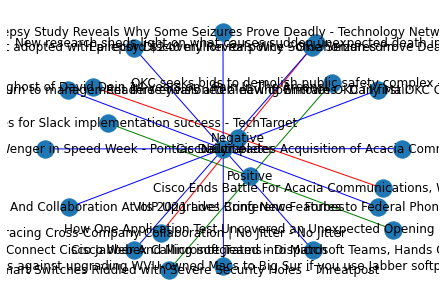

In [ ]:
# adding edges and nodes for the graph
graph = nx.Graph()
graph.add_node("Positive",color='green',style='filled',fillcolor='green')
graph.add_node("Negative",color='red',style='filled',fillcolor='red')
graph.add_node("Neutral",color='blue',style='filled',fillcolor='blue')
for index, row in df_graph.iterrows():
      if row['SENTIMENT'] == 'Positive':
        colour = 'g'
      if row['SENTIMENT'] == 'Negative':
        colour = 'r' 
      if row['SENTIMENT'] == 'Neutral':
        colour = 'b'    
      graph.add_edge(row['title'],row['SENTIMENT'],color=colour)
labels = {}
pos = nx.layout.kamada_kawai_layout(graph)
colors = nx.get_edge_attributes(graph,'color').values()
nx.draw(graph, pos=pos, edge_color=colors, with_labels= True)

Note: The above image generated is the network graph keeping Sentiment Analysis in mind.

In [ ]:
max_title = max_title.to_string(index=False)
min_title = min_title.to_string(index=False)


**Static Output file: **
In this section, we will store the results and important facts and figures generated in the static portion of the datsaset

In [ ]:
dict_of_result = {"Company's Name" : [organisation_name], 
               "Company's Founders" : [founder],
               "Company's Main Focus" : [industries],
               "Company Description" : [company_description],  
               "Top negative news" : [min_title], 
               "Top positive news" : [max_title], 
               "Founded Date":[founded_date],
               "Overall Sentiment for the Company" : [overall_sentiment], 
               "People in Company's Boards": [org_board],
               "Company's Location" : [location]}
with open("Output_Static.txt", "a") as f:
  [print(key,':',value, file=f) for key, value in dict_of_result.items()]

if overall_sentiment>=20:
  with open("Output_Static.txt", "a") as f:
    print("Invest in Company", file=f)
else:
  with open("Output_Static.txt", "a") as f:
    print("Don't invest in Company",file=f)

f.close()

Here, the static portion of the project comes to an end.

#**Dynamic Part** on a dataset of 1000 companies from CrunchBase

After the static part, in this dynamic section , user can input any name of the company and the data will be automatically be scraped related to this company .
Also, the summarization and network visualization will be performed related to the company. The results will be saved in a .txt file.

**Environment Setup**

In [ ]:
!pip install pygooglenews
!pip install transformers
!pip install fast_ml==3.68
!pip install datasets
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Libraries**

In [ ]:
import pandas as pd
from pygooglenews import GoogleNews
import re
import nltk
import json
import neattext as ntx
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import subjectivity
%matplotlib inline 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#Preparing Data#

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Team Dragonites/CrunchBase Dataset/Dataset.csv')

In [ ]:
data.rename(columns={"Organization Name": "COMPANY", "Organization Name URL":"URL","Industries":"INDUSTRIES","Headquarters Location":"HEADQUARTERS","Description":"DESCRIPTION","CB Rank (Company)":"CB_RANK","Estimated Revenue Range": "REVENUE", "Total Funding Amount":"FUNDING","Total Funding Amount Currency":"IN_CURRENCY","Total Funding Amount Currency (in USD)":"FUNDING_IN_USD","IPO Status":"IPO_STATUS","Number of Acquisitions":"ACQUISITIONS", "Founders":"FOUNDERS"}, inplace=True)
data.head()

,COMPANY,URL,INDUSTRIES,HEADQUARTERS,DESCRIPTION,CB_RANK,REVENUE,FUNDING,IN_CURRENCY,FUNDING_IN_USD,IPO_STATUS,FOUNDERS,ACQUISITIONS
0,Intel,https://www.crunchbase.com/organization/intel,"Artificial Intelligence, Information Technolog...","Santa Clara, California, United States","Intel designs, manufactures, and sells integra...",1,$10B+,1.251000e+07,USD,1.251000e+07,Public,"Gordon Moore, Robert Noyce",108.0
1,Apollo,https://www.crunchbase.com/organization/apollo...,"Asset Management, Credit, Finance, Financial S...","New York, New York, United States",Apollo Global Management is an asset managemen...,2,$500M to $1B,3.994076e+08,USD,3.994076e+08,Public,"Josh Harris, Leon Black, Marc Rowan",84.0
2,NVIDIA,https://www.crunchbase.com/organization/nvidia,"Artificial Intelligence, GPU, Hardware, Softwa...","Santa Clara, California, United States","NVIDIA is a computing platform company, innova...",3,$10B+,3.500000e+07,USD,3.500000e+07,Public,"Chris Malachowsky, Curtis Priem, Jensen Huang",21.0
3,Coinbase,https://www.crunchbase.com/organization/coinbase,"Bitcoin, Blockchain, Cryptocurrency, E-Commerc...","San Francisco, California, United States",Coinbase is an online platform that allows mer...,4,$1B to $10B,5.690348e+08,USD,5.690348e+08,Public,"Brian Armstrong, Fred Ehrsam",22.0
4,WeWork,https://www.crunchbase.com/organization/wework,"Commercial Real Estate, Coworking, Property De...","New York, New York, United States",WeWork is a platform for creators that transfo...,5,$100M to $500M,2.194578e+10,USD,2.194578e+10,Public,"Adam Neumann, Miguel McKelvey, Rebekah Neumann",21.0


#Input the name of the Company in the following code block.#

Here, usef can enter any name of the company.

In [ ]:
company_name = input("Enter company of interest: ") #Enter the company name here

Enter company of interest: amazon


In [ ]:
print(company_name)

amazon


In [ ]:
data['COMPANY'] = data['COMPANY'].str.lower()
company = company_name.lower()

In [ ]:
news_of_company = pd.DataFrame()

**Data Scraping**

In [ ]:
def getNews(field):
  gn = GoogleNews()
  s = gn.search(field)
  x =[None]*500
  i=0
  for entry in s['entries']:
    x[i] = entry['title']
    i+=1
  print(x)
  news_of_company['TITLE'] = x

In [ ]:
if company in data['COMPANY'].values:
  index = data.index[data['COMPANY']==company].tolist()
  founders = (data['FOUNDERS'].iloc[index]).to_string(index=False)
  news_string = founders.replace(",", " OR").strip()
  news_string = company + ' OR ' + news_string
  getNews(news_string)
  news_of_company.mask(news_of_company.eq('None')).dropna()
else:
  print('Company not in our cruchbase list, we will only be presenting news articles related to your input')
  getNews(company)
  news_of_company = news_of_company.mask(news_of_company.eq('None')).dropna()

["Jeff Bezos keeps a 16-year-old framed magazine as a 'reminder' that Amazon's most profitable service was once just a 'risky bet' - CNBC", "White House hits back at Amazon's Bezos after Biden inflation spat - CNBC", 'In Amazon-Watson case, question of who emailed Bezos gets answer - BusinessDen', 'When Jeff Bezos Tweets, He Wants His Journalists and Joe Biden to Listen - Jacobin magazine', 'Elon Musk and Jeff Bezos End a Tradition in Corporate America - TheStreet', 'Why Jeff Bezos Deserves to Be So Wealthy - Entrepreneur', 'Opinion | Musk and Bezo Show the Perils of Plutocratic Pettiness - The New York Times', "What is Jeff Bezos' net worth? - Fox Business", 'Jeff Bezos Just Gave Away Nearly $120 Million - Forbes', "World's 50 richest people have lost half a trillion dollars this year - New York Post", "Amazon's Jeff Bezos wants to expand into single-family home rental market - The Post Millennial", "Jeff Bezos Is Worried About Tech Valuations, and It's Weighing on Amazon Stock - Barr

In [ ]:
news_of_company.count

<bound method DataFrame.count of                                                  TITLE
0    Jeff Bezos keeps a 16-year-old framed magazine...
1    White House hits back at Amazon's Bezos after ...
2    In Amazon-Watson case, question of who emailed...
3    When Jeff Bezos Tweets, He Wants His Journalis...
4    Elon Musk and Jeff Bezos End a Tradition in Co...
..                                                 ...
495                                               None
496                                               None
497                                               None
498                                               None
499                                               None

[500 rows x 1 columns]>

**Modeling: Sentiment Analysis-NLTK Vader**

Here, we will perform the sentiment analysis on the combined prepared dataset


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
def find_sentiment_score(post):
    return sia.polarity_scores(post)["compound"] 

In [ ]:
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [ ]:
sentiment = [None] * news_of_company.shape[0]
sentiment_score = [None] * news_of_company.shape[0]
i = 0
for post in news_of_company['TITLE']:
  if post!=None:
    sentiment[i] = find_sentiment(post)
    sentiment_score[i] = find_sentiment_score(post)
    i+=1
  else:
    sentiment[i] = None
    sentiment_score[i] = None
    i+=1

news_of_company['SENTIMENT'] = sentiment
news_of_company['SCORE'] = sentiment_score

In [ ]:
news_of_company.head()

,TITLE,SENTIMENT,SCORE
0,Jeff Bezos keeps a 16-year-old framed magazine...,Positive,0.3384
1,White House hits back at Amazon's Bezos after ...,Neutral,0.0000
2,"In Amazon-Watson case, question of who emailed...",Neutral,0.0000
3,"When Jeff Bezos Tweets, He Wants His Journalis...",Neutral,0.0000
4,Elon Musk and Jeff Bezos End a Tradition in Co...,Neutral,0.0000


Note: 2 new columns are added :

1) Sentiment 

2) sentiment_score

In [ ]:
max_value = news_of_company['SCORE'].max()# Top positive news
min_value = news_of_company['SCORE'].min()# Top negative news
max_title = (news_of_company.loc[news_of_company.SCORE == max_value, 'TITLE'])
min_title = (news_of_company.loc[news_of_company.SCORE == min_value, 'TITLE'])
overall_sentiment = news_of_company['SCORE'].mean()

**Network Visualization**

In this section, we will perform a graph keeping Sentiment Analysis in mind.


---

Installing dependencies/libraries

In [ ]:
!pip install faker
!apt install libgraphviz-dev
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from faker import Faker
faker = Faker()
%matplotlib inline

In [ ]:
df_graph = news_of_company[:20]
df_graph.head()

,TITLE,SENTIMENT,SCORE
0,Jeff Bezos keeps a 16-year-old framed magazine...,Positive,0.3384
1,White House hits back at Amazon's Bezos after ...,Neutral,0.0000
2,"In Amazon-Watson case, question of who emailed...",Neutral,0.0000
3,"When Jeff Bezos Tweets, He Wants His Journalis...",Neutral,0.0000
4,Elon Musk and Jeff Bezos End a Tradition in Co...,Neutral,0.0000


Text Summerizing

In [ ]:
x = "" 
df_graph.shape

(20, 3)

In [ ]:
for i in range(0,20):
  x += df_graph['TITLE'][i] + " "

In [ ]:
print(x)

Jeff Bezos keeps a 16-year-old framed magazine as a 'reminder' that Amazon's most profitable service was once just a 'risky bet' - CNBC White House hits back at Amazon's Bezos after Biden inflation spat - CNBC In Amazon-Watson case, question of who emailed Bezos gets answer - BusinessDen When Jeff Bezos Tweets, He Wants His Journalists and Joe Biden to Listen - Jacobin magazine Elon Musk and Jeff Bezos End a Tradition in Corporate America - TheStreet Why Jeff Bezos Deserves to Be So Wealthy - Entrepreneur Opinion | Musk and Bezo Show the Perils of Plutocratic Pettiness - The New York Times What is Jeff Bezos' net worth? - Fox Business Jeff Bezos Just Gave Away Nearly $120 Million - Forbes World's 50 richest people have lost half a trillion dollars this year - New York Post Amazon's Jeff Bezos wants to expand into single-family home rental market - The Post Millennial Jeff Bezos Is Worried About Tech Valuations, and It's Weighing on Amazon Stock - Barron's U.S. needs to tax Elon Musk, J

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords = set (stopwords.words("english"))
words = word_tokenize(x)
freqTable = dict()

In [ ]:
for word in words:
  word = word.lower()
  if word in stopwords:
    continue
  if word in freqTable:
    freqTable[word] += 1
  else:
    freqTable[word] = 1

In [ ]:
sentences = sent_tokenize(x)
sentenceValue = dict()

In [ ]:
for sentence in sentences:
  for word,freq in freqTable.items():
    if word in sentence.lower():
      if sentence in sentence.lower():
        sentenceValue[sentence] += freq
      else:
        sentenceValue[sentence] = freq

In [ ]:
sumValues = 0
for sentence in sentenceValue:
  sumValues += sentenceValue[sentence]
average = int(sumValues / len(sentenceValue))

In [ ]:
summary = ''
for sentence in sentences:
  if(sentence in sentenceValue) and (sentenceValue[sentence]>(0.5*average)):
    summary += " " + sentence
print(summary)

 Jeff Bezos keeps a 16-year-old framed magazine as a 'reminder' that Amazon's most profitable service was once just a 'risky bet' - CNBC White House hits back at Amazon's Bezos after Biden inflation spat - CNBC In Amazon-Watson case, question of who emailed Bezos gets answer - BusinessDen When Jeff Bezos Tweets, He Wants His Journalists and Joe Biden to Listen - Jacobin magazine Elon Musk and Jeff Bezos End a Tradition in Corporate America - TheStreet Why Jeff Bezos Deserves to Be So Wealthy - Entrepreneur Opinion | Musk and Bezo Show the Perils of Plutocratic Pettiness - The New York Times What is Jeff Bezos' net worth? - Fox Business Jeff Bezos Just Gave Away Nearly $120 Million - Forbes World's 50 richest people have lost half a trillion dollars this year - New York Post Amazon's Jeff Bezos wants to expand into single-family home rental market - The Post Millennial Jeff Bezos Is Worried About Tech Valuations, and It's Weighing on Amazon Stock - Barron's U.S. needs to tax Elon Musk, 

**Graph Visualization**

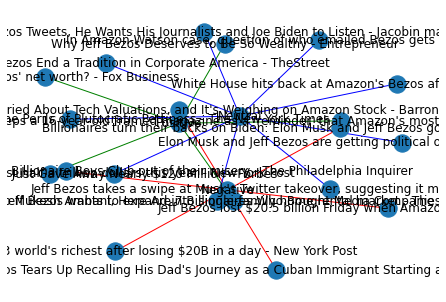

In [ ]:
graph = nx.Graph()
graph.add_node("Positive",color='green',style='filled',fillcolor='green')
graph.add_node("Negative",color='red',style='filled',fillcolor='red')
graph.add_node("Neutral",color='blue',style='filled',fillcolor='blue')
for index, row in df_graph.iterrows():
      if row['SENTIMENT'] == 'Positive':
        colour = 'g'
      if row['SENTIMENT'] == 'Negative':
        colour = 'r' 
      if row['SENTIMENT'] == 'Neutral':
        colour = 'b'    
      graph.add_edge(row['TITLE'],row['SENTIMENT'],color=colour)
labels = {}
pos = nx.layout.kamada_kawai_layout(graph)
colors = nx.get_edge_attributes(graph,'color').values()
nx.draw(graph, pos=pos, edge_color=colors, with_labels= True)

Note:The image, generated above is the netwirk visualization , which will help to determine the user if you want to invest in the company or not

**Output Dynamic file**

Here, we will save the important facts and figures of the entered company name in a .txt file and it will definitely help the user to determine if they want to invest in this company or not.

In [ ]:
investments = (data['FUNDING'].iloc[index])
acquisitions = (data['ACQUISITIONS'].iloc[index])
founders = (data['FOUNDERS'].iloc[index])
max_title = max_title.to_string(index=False)
min_title = min_title.to_string(index=False)

In [ ]:
dict_of_result = {"Company's Name" : [company], 
               "Company's Founders" : [founders], 
               "Top negative news" : [min_title], 
               "Top positive news" : [max_title], 
               "Overall Sentiment for the Company" : [overall_sentiment], 
               "Investments" : [investments], 
               "Acquisition" : [acquisitions]}
with open("Output_Dynamic.txt", "a") as f:
  [print(key,':',value, file=f) for key, value in dict_of_result.items()]

if acquisitions>=10:
  with open("Output_Dynamic.txt", "a") as f:
    print("Invest in Company", file=f)
else:
  with open("Output_Dynamic.txt", "a") as f:
    print("Don't invest in Company",file=f)

f.close()

Here, the output file of the dynamic portion of the project is generated.


#Conclusion 

The Output files provide all the data in the human readable format.

**Note: The output file is generated you can access it in folders of colab on the left hand side. We haven't used dump method so file won't be downloaded directly.**